In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

from CCplot import plot_line
from CCplot import plot1d
from CCplot import plot2d
from CCplot import figure_sizes
from CCplot import subplots
from CCplot import auto_plot_style

from CCfun  import filter_df

from CCio   import load_crystals_from_h5
from CCio   import load_prepost

In [2]:
%matplotlib inline

auto_plot_style()

In [3]:
experiment = load_prepost("/home/gonzalo/data/CC/caf_b2_annealing_pre.h5" ,
                          "/home/gonzalo/data/CC/caf_b2_annealing_post.h5")

In [4]:
experiment.pre.crystals.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0        True        8        2          0        1000    116      0.01   
1        True        8        2          0        1000    116      0.01   
2        True        8        2          0        1000    116      0.01   
3        True        8        2          0        1000    116      0.01   
4        True        8        2          0        1000    116      0.01   

   ex_wl     power           timestamp  em_wl  counts  crystal_id  \
0  800.0  0.000006 2019-12-11 16:30:41  818.0    3080  CaF_B2_313   
1  800.0  0.000006 2019-12-11 16:30:41  818.5    3083  CaF_B2_313   
2  800.0  0.000006 2019-12-11 16:30:41  819.0    3061  CaF_B2_313   
3  800.0  0.000006 2019-12-11 16:30:41  819.5    3070  CaF_B2_313   
4  800.0  0.000006 2019-12-11 16:30:41  820.0    3072  CaF_B2_313   

  crystal_type  bkgsub    rate       quantar       dquanta  wheel_no  
0          CaF     8.0   800.0  2.227473e+15  3.591514e-13         0  
1          CaF    11.0  1100.0  2.227473e+15  4.938332e-13         0  
2          CaF   -11.0 -1100.0  2.227473e+15 -4.938332e-13         0  
3          CaF    -2.0  -200.0  2.227473e+15 -8.978785e-14         0  
4          CaF     0.0     0.0  2.227473e+15  0.000000e+00         0

In [5]:
experiment.post.crystals.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0        True        8        2          0        1000    116      0.01   
1        True        8        2          0        1000    116      0.01   
2        True        8        2          0        1000    116      0.01   
3        True        8        2          0        1000    116      0.01   
4        True        8        2          0        1000    116      0.01   

   ex_wl     power           timestamp  em_wl  counts  crystal_id  \
0  800.0  0.000005 2019-12-16 10:47:25  818.0    3089  CaF_B2_313   
1  800.0  0.000005 2019-12-16 10:47:25  818.5    3085  CaF_B2_313   
2  800.0  0.000005 2019-12-16 10:47:25  819.0    3087  CaF_B2_313   
3  800.0  0.000005 2019-12-16 10:47:25  819.5    3055  CaF_B2_313   
4  800.0  0.000005 2019-12-16 10:47:25  820.0    3065  CaF_B2_313   

  crystal_type  bkgsub    rate       quantar       dquanta  wheel_no  
0          CaF    13.0  1300.0  2.213604e+15  5.872777e-13         0  
1          CaF     9.0   900.0  2.213604e+15  4.065769e-13         0  
2          CaF    12.0  1200.0  2.213604e+15  5.421025e-13         0  
3          CaF   -20.0 -2000.0  2.213604e+15 -9.035041e-13         0  
4          CaF   -11.0 -1100.0  2.213604e+15 -4.969273e-13         0

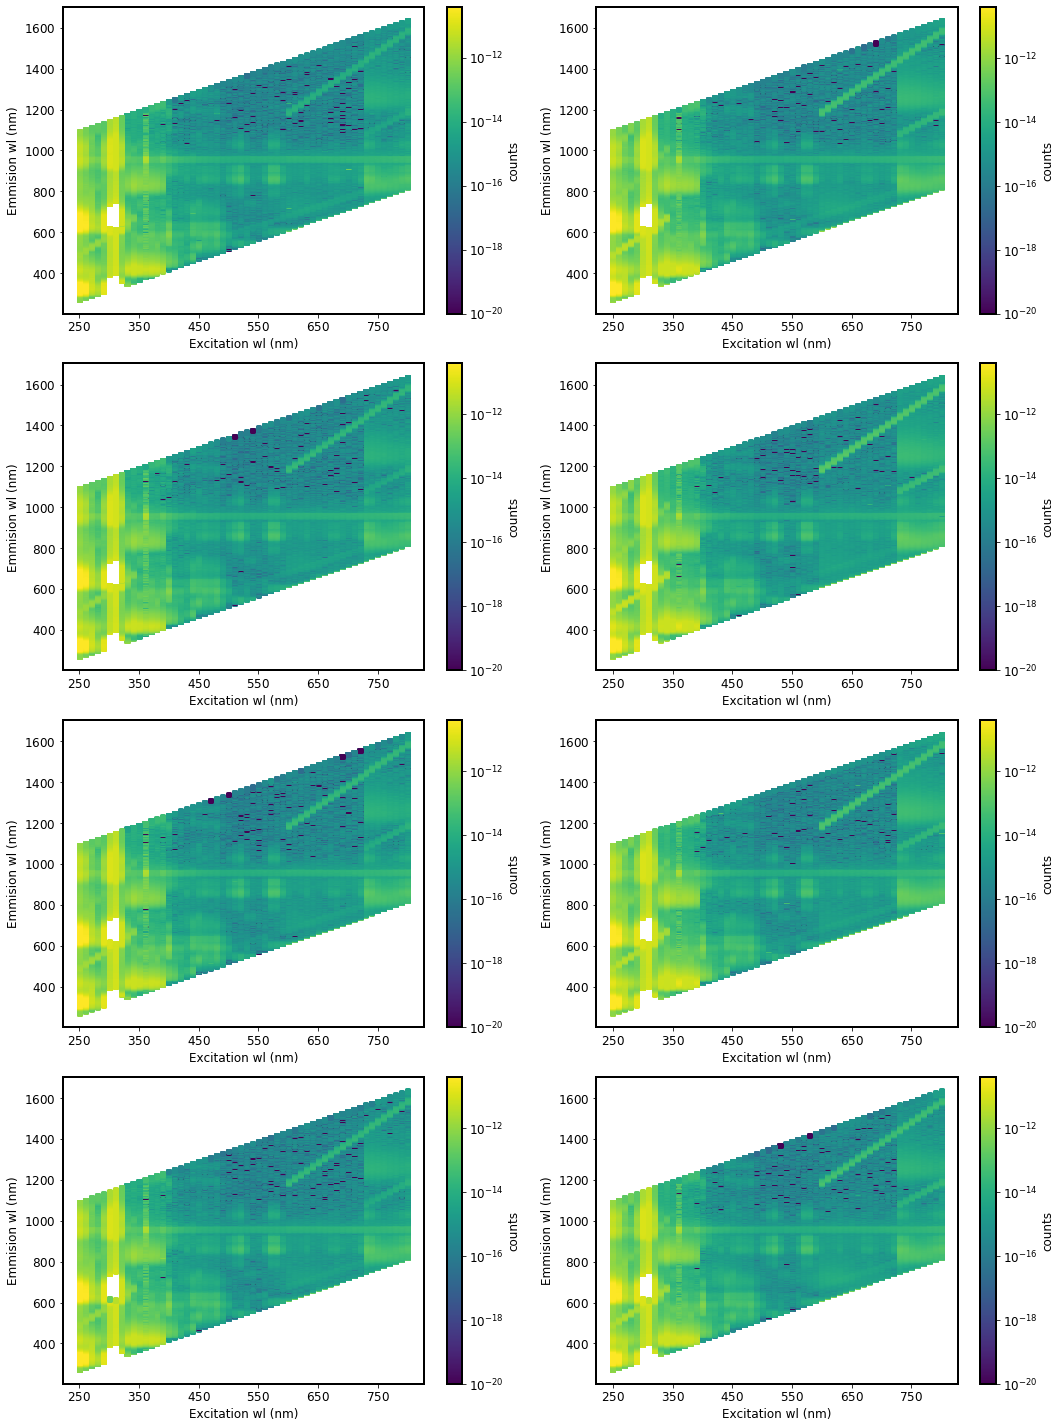

In [6]:
crystals   = sorted(experiment.pre.crystals.crystal.drop_duplicates())
n_crystals = len(crystals)

k = 1
plt.figure(figsize=(15, 5 * n_crystals))
for crystal_no in crystals:
    plt.subplot(n_crystals, 2, k); k+= 1
    
    df = filter_df(experiment.pre.crystals, crystal=crystal_no, exposure=10)
    plot2d(df.ex_wl, df.em_wl, df.dquanta + 1e-20, log=True)
    plt.xticks(np.arange(250, 850, 100))

    plt.subplot(n_crystals, 2, k); k+= 1
    
    df = filter_df(experiment.post.crystals, crystal=crystal_no, exposure=10)
    plot2d(df.ex_wl, df.em_wl, df.dquanta + 1e-20, log=True)
    plt.xticks(np.arange(250, 850, 100))

    
plt.tight_layout()

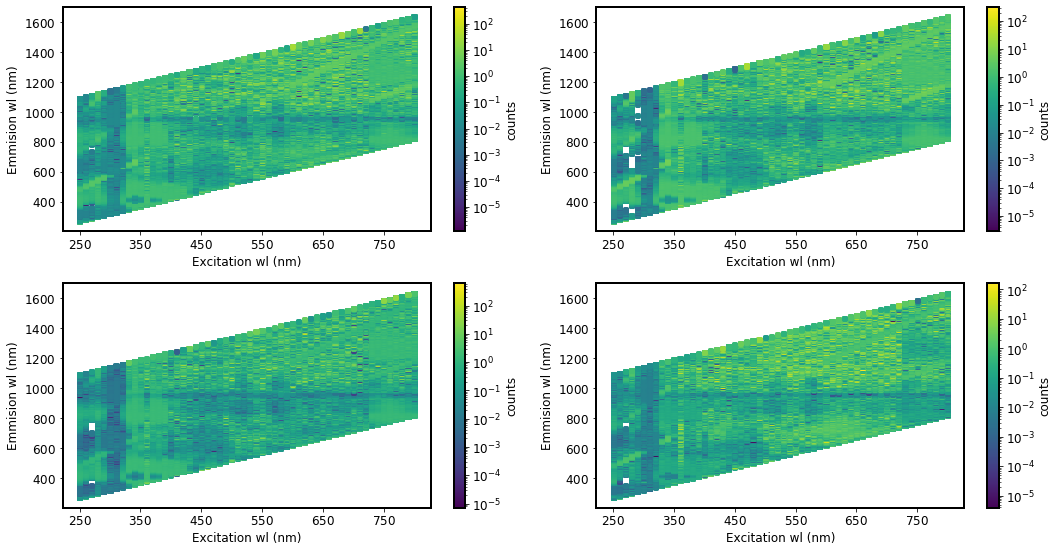

In [7]:
crystals   = sorted(experiment.pre.crystals.crystal.drop_duplicates())
n_crystals = len(crystals)

k = 1
plt.figure(figsize=(15, 15))
for crystal_no in crystals:
    plt.subplot(n_crystals, 2, k); k+= 1
    
    pre  = filter_df(experiment.pre .crystals, crystal=crystal_no, exposure=10)
    post = filter_df(experiment.post.crystals, crystal=crystal_no, exposure=10)
    
    plot2d(pre.ex_wl, pre.em_wl, (post.dquanta - pre.dquanta + 1e-20)/pre.dquanta, log=True)
    plt.xticks(np.arange(250, 850, 100))

    
plt.tight_layout()

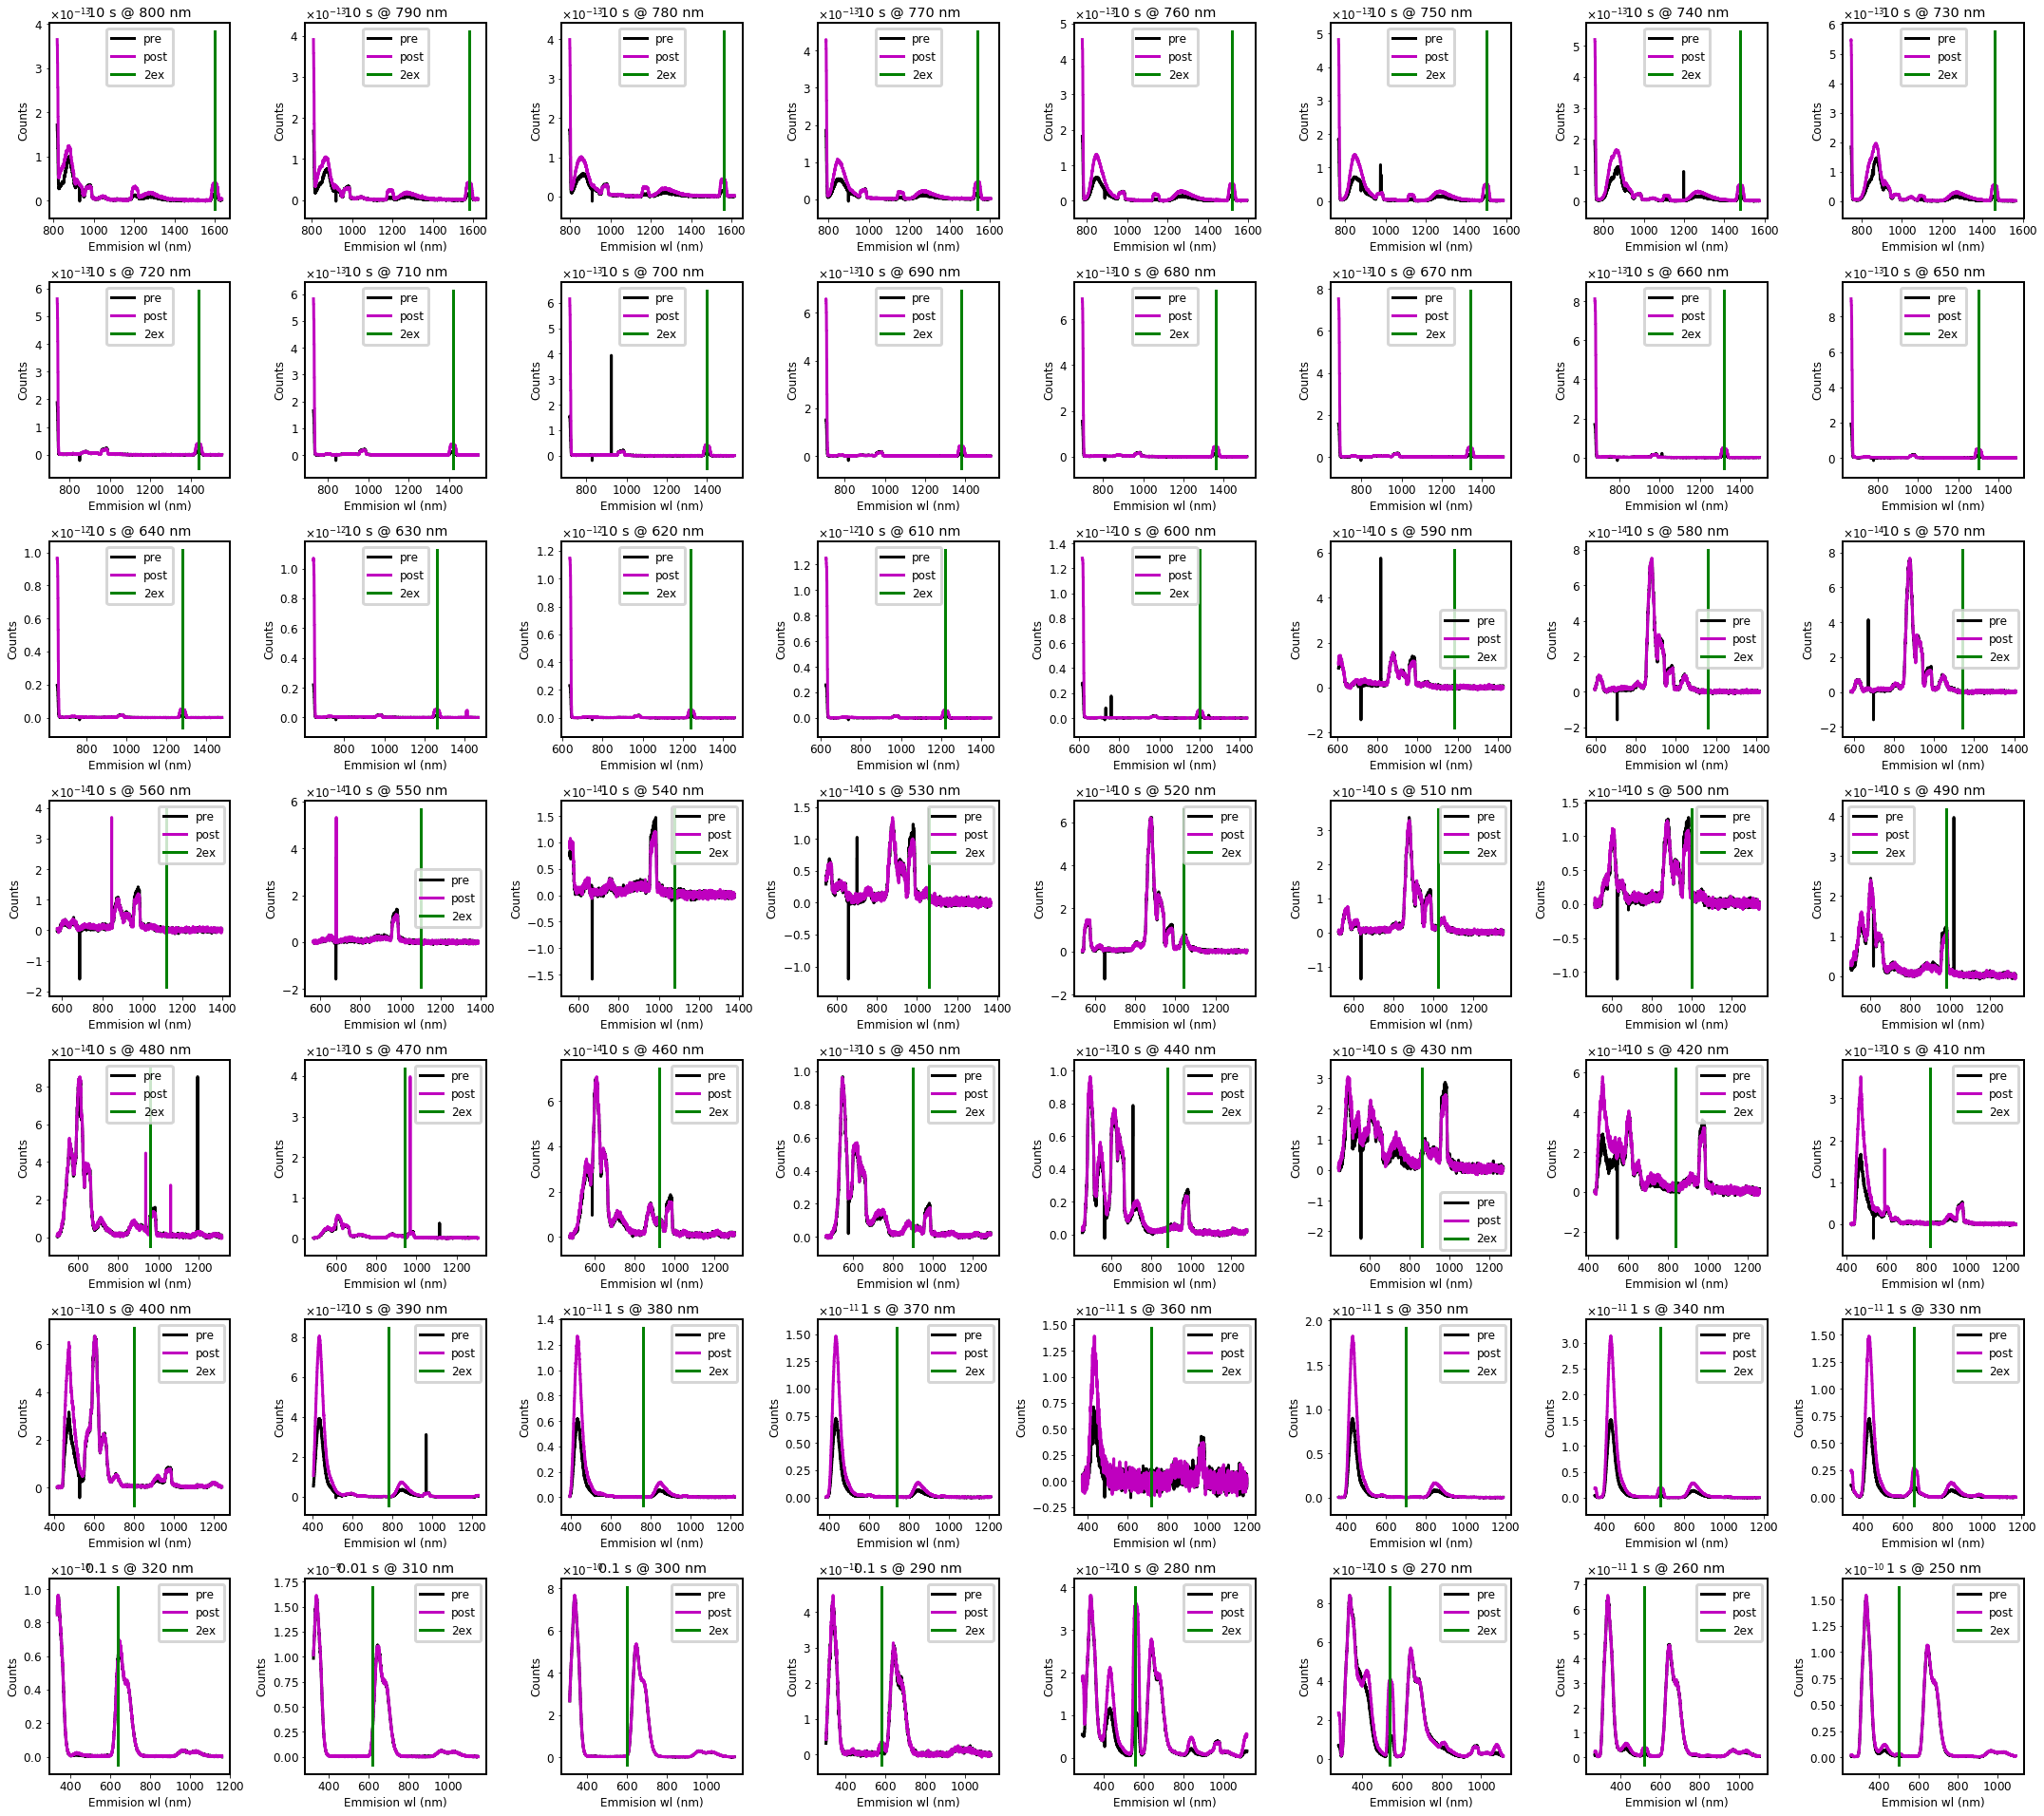

In [11]:
def exposure(wl):
    if wl >  380: return 10
    if wl >  320: return  1
    if wl == 310: return 0.01
    if wl >  280: return  0.1
    if wl >  260: return 10
    if wl >= 250: return  1
    raise ValueError(f"Invalid wl: {wl}")

pres  = filter_df(experiment.pre .crystals, crystal=8)
posts = filter_df(experiment.post.crystals, crystal=8)

wls = list(map(int, pres.ex_wl.drop_duplicates()))
nwl = len(wls)
plt.figure(figsize=(30, 30))
for k, wl in enumerate(wls, start=1):
    plt.subplot(8, 8, k)
    
    pre  = filter_df(pres , ex_wl=wl, exposure=exposure(wl));assert len(pre)  == 1600, len(pre)
    post = filter_df(posts, ex_wl=wl, exposure=exposure(wl));assert len(post) == 1600, len(post)
    plot1d(pre.em_wl, pre .dquanta, label="pre" )
    plot1d(pre.em_wl, post.dquanta, label="post")
    for i in range(2, 3):
        plot_line(wl * i, label="2ex")
    plt.legend()
    plt.title(f"{exposure(wl)} s @ {wl} nm")
    
plt.tight_layout()